
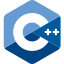
<br>

<div style="text-align:center; font-size:200%;">
 <b>GRASP: Creator</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 14 GRASP Creator.ipynb -->
<!-- slides/module_500_solid_grasp/topic_160_grasp_creator.cpp -->


- Use Case "Spiel initialisieren"
- Bisher:
  - `World`- und `Location`-Klassen
  - Attribute und Getter
- Frage:
  - Wer erzeugt die `Location`-Instanzen?


## Kandidaten

<div style="float:left;margin:auto;padding:80px 0;width:25%">
<ul>
<li> <code>Player</code></li>
<li> <code>Game</code></li>
<li> <code>Pawn</code></li>
<li> <code>World</code></li>
</ul>
</div>
<img src="img/adv-domain-03-small.svg"
     style="float:right;margin:auto;width:70%"/>


## Das Creator Pattern (GRASP)

### Frage

- Wer ist verantwortlich für die Erzeugung eines Objekts?

### Antwort

Klasse `A` bekommt die Verantwortung, ein Objekt der Klasse `B` zu erzeugen,
wenn eine oder mehrere der folgenden Bedingungen zutreffen:

- `A` enthält  `B` (oder ist Eigentümer von `B`)
- `A` speichert `B` (z.B. in einer Datenbank)
- `A` benutzt `B` eng
- `A` hat die initialisierenden Daten, die `B` benötigt


### Bemerkung

- Factory ist oft eine Alternative zu Creator


## Creator

<div style="float:left;margin:auto;padding:80px 0;width:25%">
<ul>
<li> <strike><code>Player</code></strike></li>
<li> <strike><code>Game</code></strike></li>
<li> <code>Pawn</code></li>
<li> <b><code>World</code></b></li>
</ul>
</div>
<img src="img/adv-domain-03-small.svg"
     style="float:right;margin:auto;width:70%"/>

```cpp
class World {
public:
    World(const std::vector<LocationData>& locationData,
        std::string initialLocationName);

    explicit World(const std::vector<data::LocationData>& locationData);

    const std::unordered_map<std::string, Location>& GetLocations() const;
    const std::string& GetInitialLocationName() const;

private:
    std::unordered_map<std::string, Location> locations;
    std::string initialLocationName;
};
```

```cpp
World::World(const std::vector<LocationData>& locationData, std::string initialLocationName)
    : locations {}
    , initialLocationName { std::move(initialLocationName) }
{
    locations.reserve(locationData.size());
    for (const auto& location : locationData) {
        locations.emplace(location.name, location);
    }
}
```


- Wir können die `main()` Methode anpassen, um die `World`-Klasse zu
  verwenden.

```cpp
using namespace adventure_sk;
```